Merged Dataset:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0      

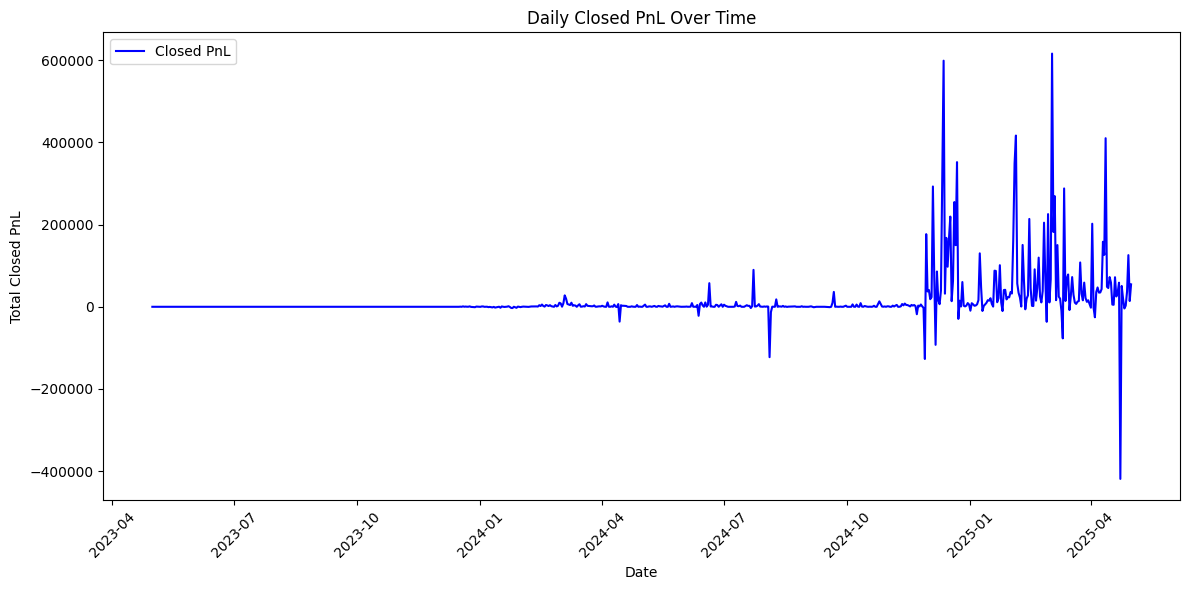

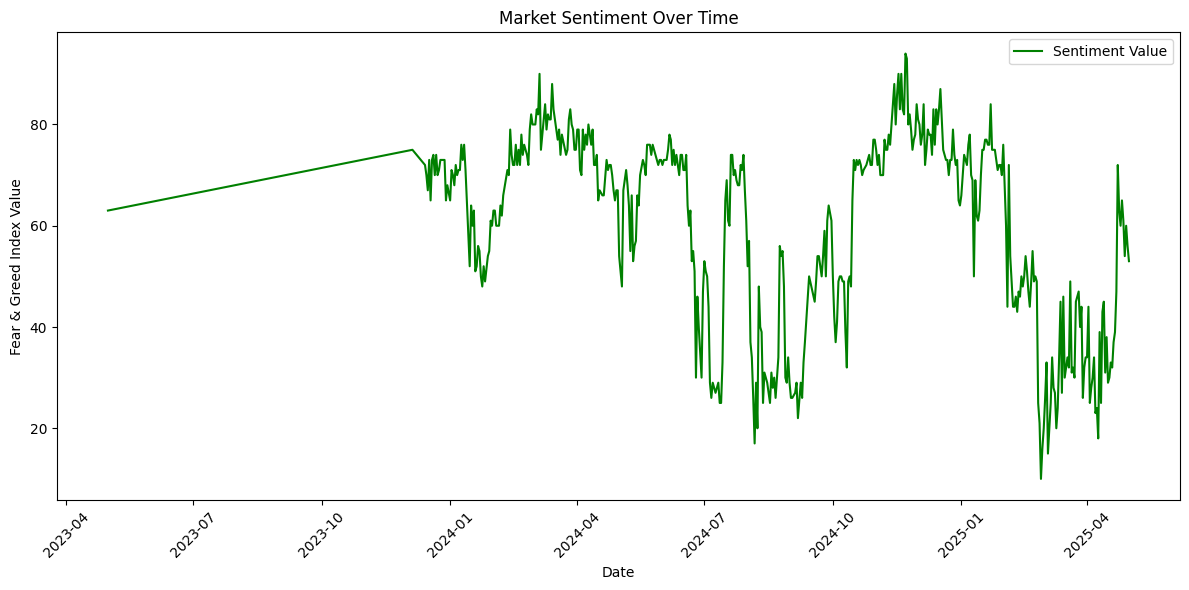

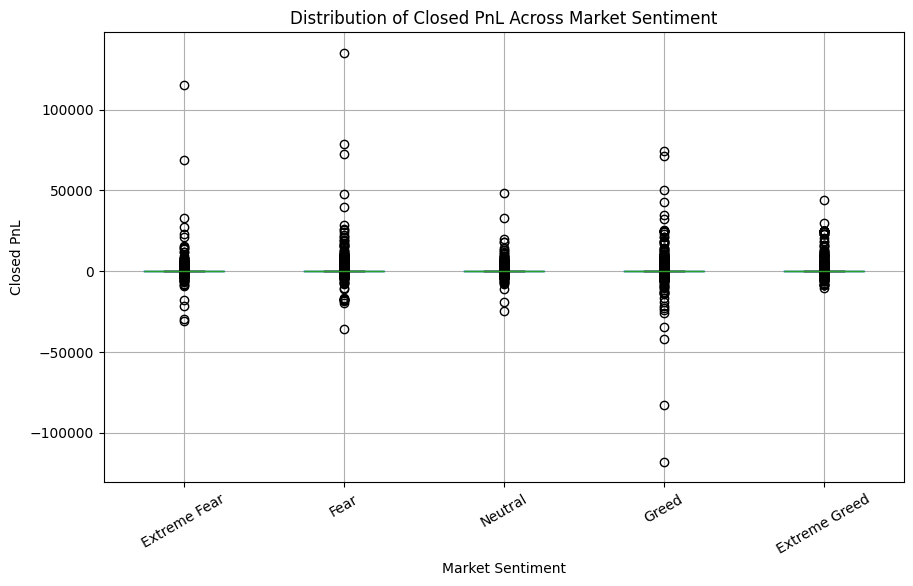

<Figure size 1000x600 with 0 Axes>

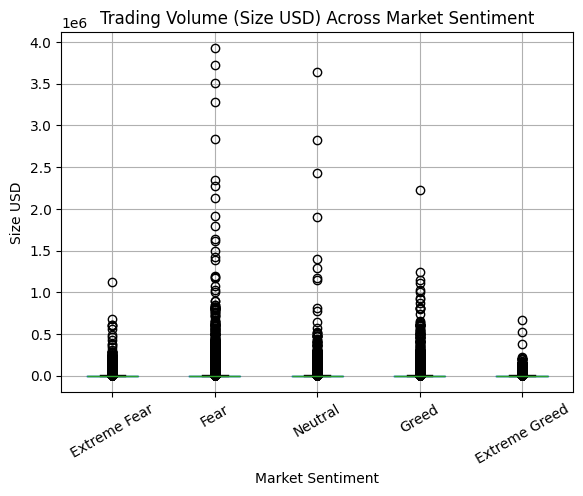

In [4]:
import pandas as p
import matplotlib.pyplot as plt

# Load Datasets
# =============================
fear_dataset = p.read_csv("csv_files/fear_greed_index.csv")
historical_dataset = p.read_csv("csv_files/historical_data.csv")

#  Converting Dates
# Convert fear_greed_index 'date' column
fear_dataset['date'] = p.to_datetime(fear_dataset['date']).dt.date

# Convert historical_data 'Timestamp IST' column
historical_dataset['date'] = p.to_datetime(
    historical_dataset['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
).dt.date

# Merge Datasets

merged_df = p.merge(
    historical_dataset,
    fear_dataset[['date','classification','value']],
    on='date',
    how='left'
)

print("Merged Dataset:")
print(merged_df.head())

# Daily Summary

daily_summary = merged_df.groupby(['date','classification','value']).agg({
    'Closed PnL': 'sum',
    'Size USD': 'sum',
    'Execution Price': 'mean'
}).reset_index()

print("Daily Summary:")
print(daily_summary.head())

# VISUALS

# --- (A) Total Closed PnL over time ---
plt.figure(figsize=(12,6))
plt.plot(daily_summary['date'], daily_summary['Closed PnL'], label="Closed PnL", color="blue")
plt.xlabel("Date")
plt.ylabel("Total Closed PnL")
plt.title("Daily Closed PnL Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("outputs/closed_pnl_over_time.png")
#plt.close()
plt.show()

# --- (B) Market Sentiment Value over time ---
plt.figure(figsize=(12,6))
plt.plot(daily_summary['date'], daily_summary['value'], label="Sentiment Value", color="green")
plt.xlabel("Date")
plt.ylabel("Fear & Greed Index Value")
plt.title("Market Sentiment Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("outputs/Market Sentiment Over Time.png")
plt.show()

# --- (C) Distribution of PnL by Sentiment (Boxplot) ---
# Convert classification to categorical for correct order
categories = ['Extreme Fear','Fear','Neutral','Greed','Extreme Greed']
merged_df['classification'] = p.Categorical(
    merged_df['classification'], 
    categories=categories, 
    ordered=True
)

merged_df.boxplot(column='Closed PnL', by='classification', figsize=(10,6))
plt.title("Distribution of Closed PnL Across Market Sentiment")
plt.suptitle("")  # remove extra title
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=30)
plt.savefig("outputs/Distribution of Closed PnL Across Market Sentiment.png")
plt.show()

# --- (D) Trading Volume (Size USD) vs Sentiment ---
plt.figure(figsize=(10,6))
merged_df.boxplot(column='Size USD', by='classification')
plt.title("Trading Volume (Size USD) Across Market Sentiment")
plt.suptitle("")
plt.xlabel("Market Sentiment")
plt.ylabel("Size USD")
plt.xticks(rotation=30)
plt.savefig("outputs/Trading Volume (Size USD) Across Market Sentiment.png")
plt.show()
plt